## Ejemplos de K-means en OpenCV

### Datos con una sola caracteristica

Considere, usted tiene un conjunto de datos con una sola característica, es decir, unidimensional. Por ejemplo, podemos tomar nuestro problema con la camiseta cuando usas solo la altura de las personas para decidir el tamaño de la camiseta.

Así que comenzamos creando datos y los trazamos en Matplotlib.

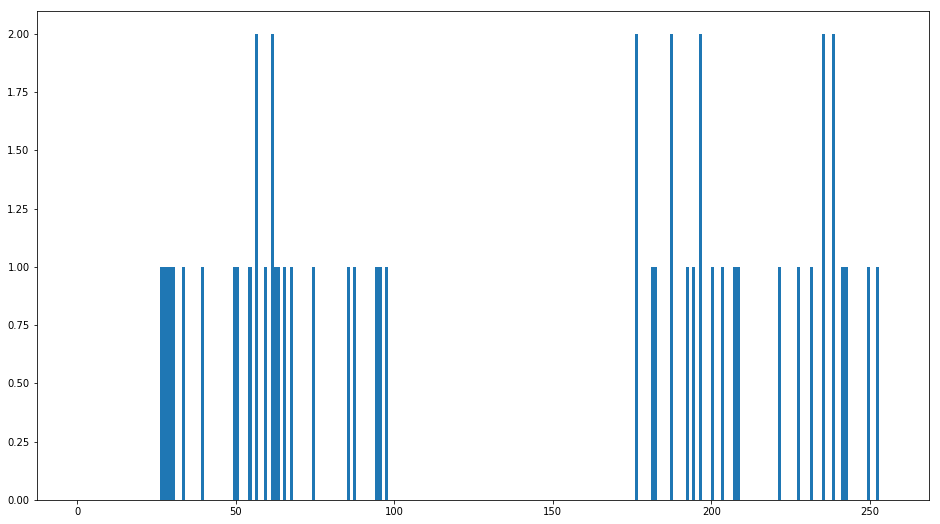

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256])
plt.show()

Ahora aplicamos la función KMeans. Antes de eso necesitamos especificar los criterios . Mi criterio es tal que, cada vez que se ejecutan 10 iteraciones de algoritmo, o se alcanza una precisión , detenga el algoritmo y devuelva la respuesta.epsilon = 1.0

In [12]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(z,2,None,criteria,10,flags)

Esto nos da la compacidad, las etiquetas y los centros. En este caso, obtuve centros como 60 y 207. Las etiquetas tendrán el mismo tamaño que la de los datos de prueba, donde cada dato se etiquetará como '0', '1', '2', etc., según sus centroides. Ahora dividimos los datos en diferentes grupos dependiendo de sus etiquetas.

In [13]:
A = z[labels==0]
B = z[labels==1]

Ahora trazamos A en color rojo y B en color azul y sus centroides en color amarillo.

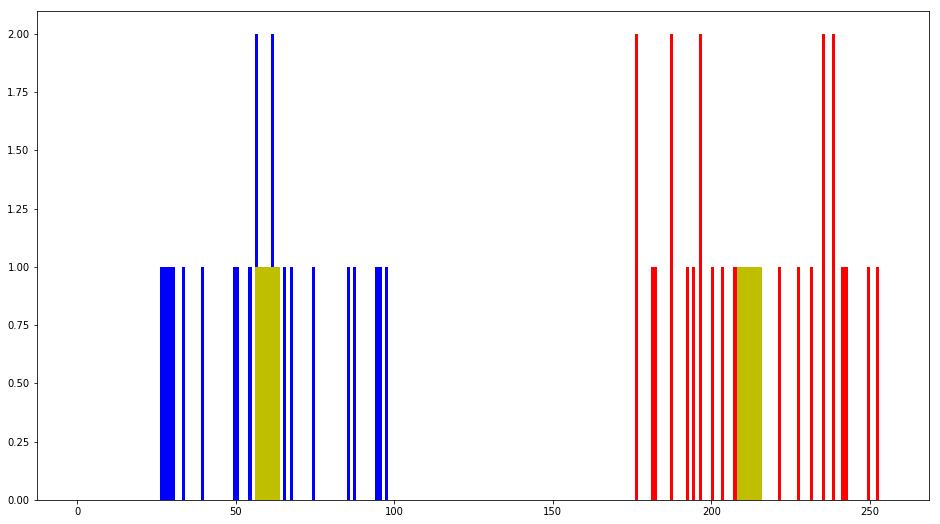

In [14]:
# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()

### Datos con multiples caracteristicas

En el ejemplo anterior, tomamos solo la altura para el problema de la camiseta. Aquí, tomaremos tanto la altura como el peso, es decir, dos características.

Recuerde, en el caso anterior, hicimos nuestros datos a un solo vector de columna. Cada característica se organiza en una columna, mientras que cada fila corresponde a una muestra de prueba de entrada.

Por ejemplo, en este caso, establecemos datos de prueba de tamaño 50x2, que son alturas y pesos de 50 personas. La primera columna corresponde a la altura de todas las 50 personas y la segunda columna corresponde a sus pesos. La primera fila contiene dos elementos donde el primero es la altura de la primera persona y el segundo su peso. De manera similar, las filas restantes corresponden a alturas y pesos de otras personas. Compruebe la imagen a continuación:

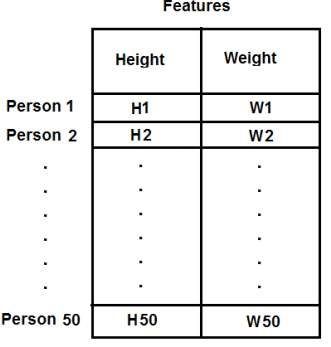

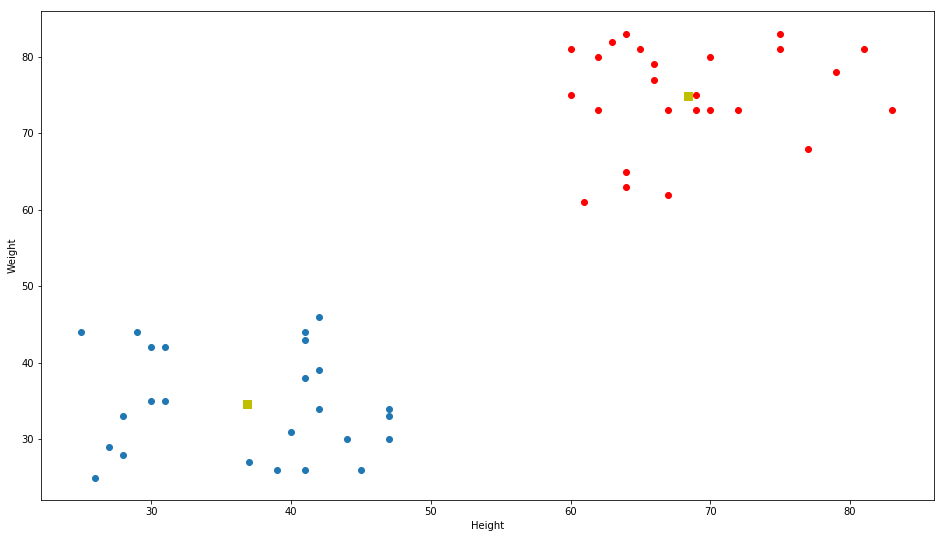

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

## Datos con multiples caracteristicas y scikit-learn

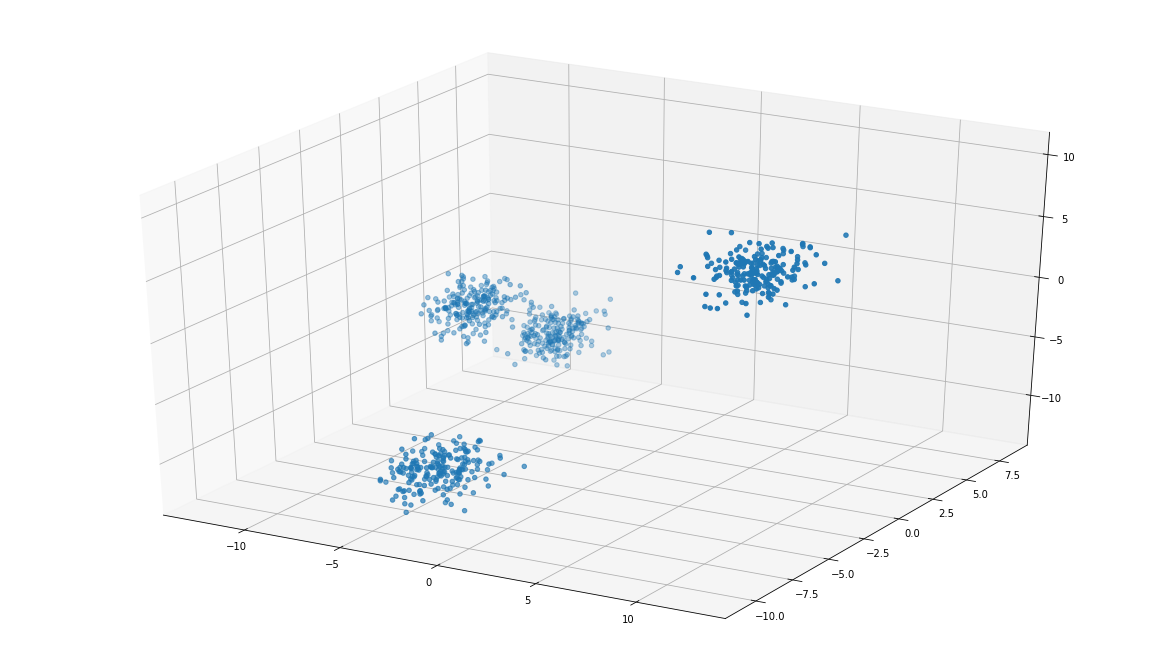

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [8]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

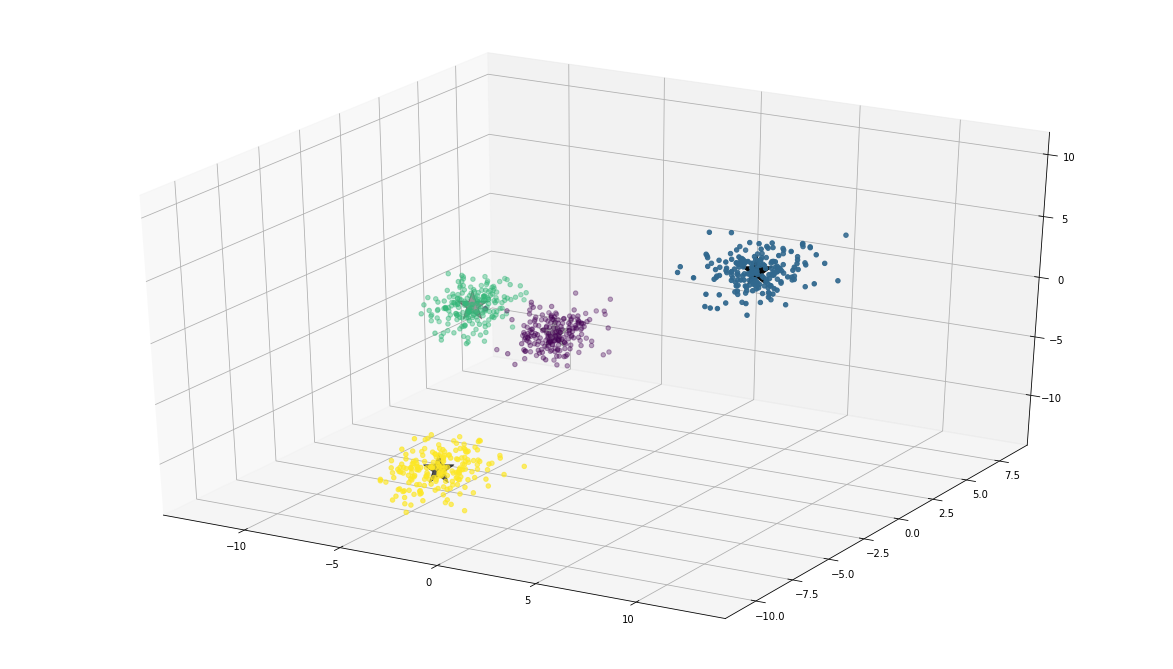

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

En la grafica puedes ver 4 grupos y sus centroides como estrellas. El enfoque de scikit-learn es muy simple y conciso.

### Datos con multiples caracteristicas

La cuantización del color es el proceso de reducir el número de colores en una imagen. Una razón para hacerlo es reducir la memoria. A veces, algunos dispositivos pueden tener una limitación tal que puede producir solo un número limitado de colores. En esos casos también, se realiza la cuantificación del color. Aquí usamos el agrupamiento k-means para la cuantización del color.

No hay nada nuevo que explicar aquí. Hay 3 características, digamos, R, G, B. Así que necesitamos cambiar la forma de la imagen a una matriz de tamaño Mx3 (M es el número de píxeles en la imagen). Y después de la agrupación, aplicamos valores de centroide (también es R, G, B) a todos los píxeles, de modo que la imagen resultante tendrá un número específico de colores. Y de nuevo, tenemos que remodelarlo de nuevo a la forma de la imagen original. A continuación se muestra el código:

In [16]:
import numpy as np
import cv2

img = cv2.imread('C:/Users/gdljoses/Documents/Procesamiento de imagenes/original.png')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
K1 = 4
K3 = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
ret1,label1,center1=cv2.kmeans(Z,K1,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
ret3,label3,center3=cv2.kmeans(Z,K3,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
####
center1 = np.uint8(center1)
res1 = center1[label1.flatten()]
res21 = res1.reshape((img.shape))
####
center3 = np.uint8(center3)
res3 = center3[label3.flatten()]
res23 = res3.reshape((img.shape))


cv2.imshow('Original',img)
cv2.imshow('2 colores',res2)
cv2.imshow('4 colores',res21)
cv2.imshow('8 colores',res23)
cv2.waitKey(0)
cv2.destroyAllWindows()

## En tiempo real

In [22]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while (cap.isOpened()):
    
    _, frame = cap.read()
    if _:
        
        img = frame
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        lower_red = np.array([150,150,50])
        upper_red = np.array([180,255,150])
        
        Z = img.reshape((-1,3))

        # convert to np.float32
        Z = np.float32(Z)

        
        # define criteria, number of clusters(K) and apply kmeans()
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = 4
        ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

        # Now convert back into uint8, and make original image
        center = np.uint8(center)
        res = center[label.flatten()]
        res2 = res.reshape((img.shape))

        cv2.imshow('Frame',frame)
        cv2.imshow('Mask',res2)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
            break
    if k == 13:
            cv2.imwrite('C:/Users/gdljoses/Documents/Procesamiento de imagenes/gidpdi2.jpg',res2)
            break

cv2.destroyAllWindows()
cap.release()